In [1]:
import sys
import os
import time
from typing import List, Dict, Callable, Tuple

import numpy as np
from matplotlib import pyplot as plt

from openslide import OpenSlide
import pyvips


In [2]:

    
        
# class WholeSlideImageVips(WholeSlideImage):
#     def __init__(self, filepath : str, spacings: List[float]) -> None:
#         super().__init__(filepath)
#         self._images = {} 
#         self._add_spacing_images(spacings)

#     @property
#     def level_count(self) -> int:
#         return int(self._image.get_value('openslide.level-count'))
     
#     def load_region(self, 
#                     x : int, 
#                     y : int, 
#                     width : int, 
#                     height : int, 
#                     spacing : float, 
#                     center: bool = True,
#                     relative : bool = False) -> np.ndarray:
        
#         downsampling = self.downsampling(spacing)
#         if not relative:
#             x, y = x//downsampling, y//downsampling 
#         if center:
#             x, y = x-width//2, y-height//2
#         patch =  self._images[spacing].fetch(x, y, width, height)
#         return np.array(patch).reshape(width,height,4)[:,:,:3]
                
#     def _open_image(self, filepath: str) -> pyvips.vimage.Image:
#         return pyvips.vimage.Image.openslideload(filepath)
    
#     def _open_image_spacing(self, filepath: str, spacing) -> pyvips.Region:
#         level = self._get_level_from_spacing(spacing)
#         return pyvips.Region.new(pyvips.vimage.Image.openslideload(filepath, level=level))
    
#     def _add_spacing_images(self, spacings : List[float]) -> None:
#         level_zero_spacing = self.spacings[0]
#         self._images[level_zero_spacing] = pyvips.Region.new(self._image)
#         for spacing in spacings:
#             if spacing != level_zero_spacing:
#                 self._images[spacing] = self._open_image_spacing(self.filepath, spacing)
    
#     def _init_spacing(self) -> float:
#         return self.__init_spacing(read_spacing_info=self._image.get_value)



In [3]:
t1 = time.time()
wsi_openslide = WholeSlideImageOpenSlide('/home/mart/Radboudumc/data/breast/T10-00485-I-19-1-gr3.tif')
print(time.time() - t1)

0.0017154216766357422


In [7]:
t1s = time.time()
patch_openslide = wsi_openslide.get_patch(30064, 40000, 1024, 1024, 0.5)
print(time.time() - t1s)

# t1v = time.time()
# patch_vips = wsi_vips.load_region(28000, 50000, 64, 64, 0.5, relative=False)
# print(time.time() - t1v)

0.04111504554748535


In [8]:
64*64*3

12288

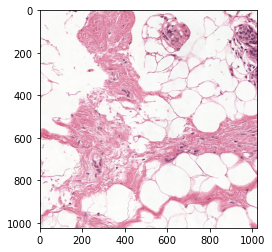

In [9]:
plt.imshow(patch_openslide)
plt.show()

# plt.imshow(patch_vips)
# plt.show()